In [1]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [2]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#แปลงหน่วย เพื่อง่ายต่อการคำนวน
K1=G*t_nd*m_nd/(r_nd**2*v_nd) 
K2=v_nd*t_nd/r_nd

In [3]:
#Define masses
m1=1/333000 #Alpha Centauri A
m2=1 #Alpha Centauri B
m3 = 1/333000 # ดาวโง่ๆแต่โก้จริงๆ
#Define initial position vectors
r1=[1,0,0] #m
r2=[0,0,0] #m
r3 =[-1,0,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Define initial velocities
v1=[0,0,1] #m/s
v2=[0,0.01,0] #m/s
v3 = [0,0,-1]
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/3332964771.py:10: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/3332964771.py:11: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/3332964771.py:12: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/3332964771.py:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/3332964771.py:21: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0,

In [4]:
#A function defining the equations of motion 
def ThreeBodyEquations(y0,t,G=G,m1=m1,m2=m2,m3=m3): 
    r1=y0[:3]
    r2=y0[3:6]
    r3=y0[6:9]
    v1=y0[9:12]
    v2=y0[12:15]
    v3 = y0[15:18]

    
    r12=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    r13=sci.linalg.norm(r3-r1) #Calculate magnitude or norm of vector
    r23=sci.linalg.norm(r3-r2) #Calculate magnitude or norm of vector

    # ปลาย - ต้น
    dv1bydt=K1*m2*(r2-r1)/r12**3#+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3#+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3#+K1*m2*(r2-r3)/r23**3

    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3

    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    r_derivs=sci.concatenate((r_derivs,dr3bydt))

    v_derivs=sci.concatenate((dv1bydt,dv2bydt))
    v_derivs=sci.concatenate((v_derivs,dv3bydt))

    derivs=sci.concatenate((r_derivs,v_derivs))
    return derivs

In [5]:
#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #create array of initial params

init_params=init_params.flatten() #flatten array to make it 1D
init_params.ndim
time_span=sci.linspace(0,20,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span)

C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/1708769575.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,v1,v2,v3]) #create array of initial params
C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/1708769575.py:6: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,20,500) #8 orbital periods and 500 points
C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/1564878259.py:24: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((dr1bydt,dr2bydt))
C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/1564878259.py:25: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((r_derivs,dr3bydt))
C:\Users\NATTAK~1\AppData

In [6]:
r1_sol=three_body_sol[:,:3].T.reshape(3,-1)
r2_sol=three_body_sol[:,3:6].T.reshape(3,-1)
r3_sol=three_body_sol[:,6:9].T.reshape(3,-1)

## plot

<IPython.core.display.Javascript object>


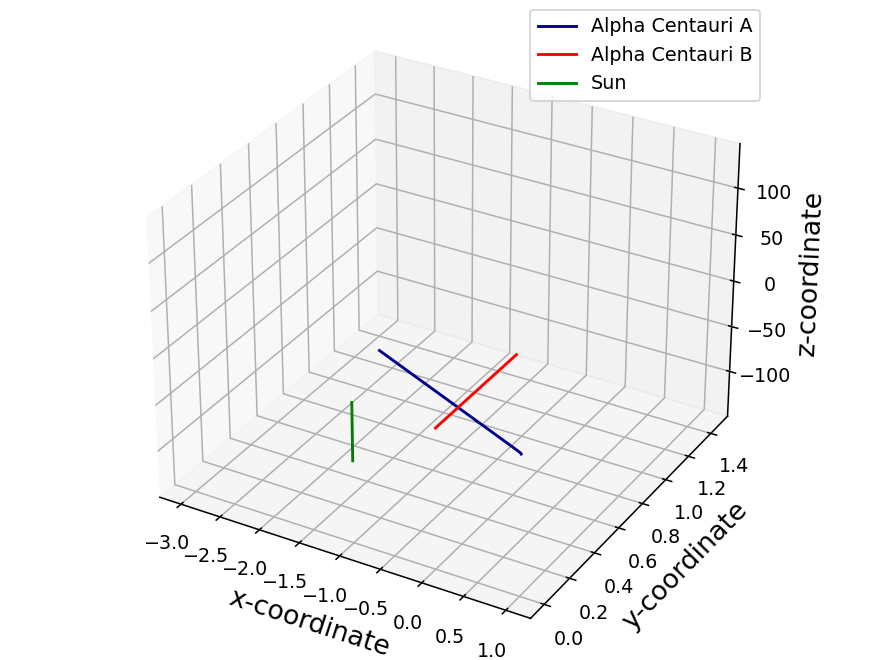

C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_19292/2867091067.py:25: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Visualization of orbits of stars in a two-body system\n')

In [7]:
import numpy as np
%matplotlib notebook
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])
    return line
t = r1_sol[2]
x = r1_sol[0]
y = r1_sol[1]
#--------------------------------------------------------------------------------
t2 = r2_sol[2]
x2 = r2_sol[0]
y2 = r2_sol[1]
#------------------------------------------------------------------------------
t3 = r3_sol[2]
x3 = r3_sol[0]
y3 = r3_sol[1]

dataSet1 = np.array([x, y, t])
dataSet2 = np.array([x2, y2, t2])
dataSet3 = np.array([x3, y3, t3])
numdatapoint = len(r1_sol)
fig=plt.figure()
ax = Axes3D(fig)
line1 = ax.plot(r1_sol[0],r1_sol[1],r1_sol[2],color="darkblue",label='Alpha Centauri A')[0]
line2 = ax.plot(r2_sol[0],r2_sol[1],r2_sol[2],color="red",label='Alpha Centauri B')[0]
line3 = ax.plot(r3_sol[0],r3_sol[1],r3_sol[2],color="green",label='Sun')[0]
ax.legend()
interval= 2
line_ani1 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet1,line1), interval=interval, blit=True)
line_ani2 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet2,line2), interval=interval, blit=True)
line_ani3 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet3,line3), interval=interval, blit=True)

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
